<a href="https://www.kaggle.com/code/milicaradisavljevic/kickstarter-projects-nn?scriptVersionId=185113173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kickstarter-projects/ks-projects-201801.csv
/kaggle/input/kickstarter-projects/ks-projects-201612.csv


# Import the libraries

In [2]:
import pandas as pd #managing the data
import numpy as np #mathematical operations
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

2024-06-23 23:04:09.592623: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 23:04:09.592764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 23:04:09.760313: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load the data

In [3]:
data = pd.read_csv("/kaggle/input/kickstarter-projects/ks-projects-201801.csv")
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# About the data


The database contains information about projects launched on the popular Kickstarter platform and their success.  Kickstarter allows creators to present their projects to the public, seeking funding to bring their ideas to life. The data encompasses a wide range of project categories, including technology, film, music, art, games, publishing, and more. Data are collected from Kickstarter Platform.

Key Attributes:
- ID: Project ID;
- name: Project name;
- category: Sub-category;
- main_category: Main category of campaign;
- currency: Currency used to support;
- deadline: The date by which the project must reach its funding goal;
- goal: The funding goal is the amount of money that a creator needs to complete their project;
- launched: The date and time when the project was launched;
- pledged: The amount pledged by "crowd";
- state: The current status of the project (e.g., successful, failed, canceled, live, suspended);
- backers: The number of backers who have pledged money to the project;
- country: The country from which the project was launched;
- usd_pledged: The amount of money pledged in US dollars, which is standardized to facilitate comparison across projects using different currencies;
- usd_pledged_real;
- usd_goal_real: The funding goal in US dollars, standardized for the same reason as USD Pledged;

Fature descriptions taken from: https://www.kaggle.com/datasets/kemical/kickstarter-projects


# Objectives

- Main goal is to train a model that will be able to predict whether a Kickstarter project will be successfull or not. We will use a Neural Network to make our predictions. 
- The secondary goal is to explore the data, clean it and do a basic EDA analysis.


# EDA and data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


The dataset contains 378661 entries and 15 columns. We have 8 categorical and 7 numeric columns. 

Null values are presenty in "name" and "usd_pledged" columns. In "name" column in a small number, but that column is certainly not of interest to us for further analysis, so we will remove it together with the ID column after EDA analysis. In "usd_pledged" we have 3797 null values so we will fill missing values in the column with the mean value of that column.



In [5]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [6]:
# Fill missing values in the 'usd pledged' column with the mean value of the 'usd pledged' column
data['usd pledged'] = data['usd pledged'].fillna(data['usd pledged'].mean())

In [7]:
data.isnull().sum().sum()

4

In [8]:
#checking for duplicates 
data.duplicated().sum()

0

Excellent, no duplicates were found in the dataset.

### Currencies used to support projects

currency
USD    0.780025
GBP    0.090139
EUR    0.045965
CAD    0.039513
AUD    0.020995
SEK    0.004722
MXN    0.004627
NZD    0.003895
DKK    0.002982
CHF    0.002028
NOK    0.001907
HKD    0.001632
SGD    0.001466
JPY    0.000106
Name: proportion, dtype: float64

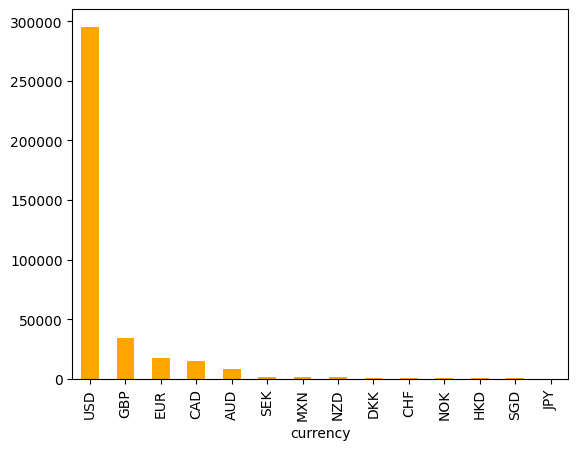

In [9]:
data.currency.value_counts().plot.bar(color='orange')
data.currency.value_counts(normalize=True)

The most used currency to support the projects is USD with 79%, far behind are GBP and EUR and other currencies.

### Project state

state
failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: proportion, dtype: float64

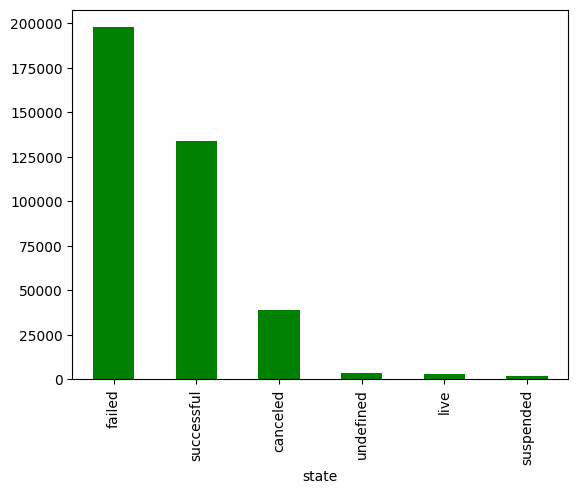

In [10]:
#exploring unique values in the "state" column - future target
data.state.value_counts().plot.bar(color=['green'])
data.state.value_counts(normalize=True)

Most of the projects in this database were completed with "failed" and "successful", which is great, because these will be our values of interest in the future, so we will remove the other unique values. From the graph, we can see that 52% of projects on the Kickstarter platform failed, 35% succeeded, and in 3rd place were canceled projects with 10%.

In [11]:
data = data[data['state'].isin(['failed', 'successful'])].reset_index(drop=True)

In [12]:
data['state'].unique()

array(['failed', 'successful'], dtype=object)

In [13]:
data.shape

(331675, 15)

### Popular project categories

In [14]:
data.main_category.value_counts(normalize=True)

main_category
Film & Video    0.170429
Music           0.138536
Publishing      0.106867
Games           0.085991
Technology      0.081556
Art             0.077308
Design          0.076472
Food            0.066493
Fashion         0.059622
Theater         0.030880
Comics          0.029782
Photography     0.029212
Crafts          0.023571
Journalism      0.012509
Dance           0.010773
Name: proportion, dtype: float64

In [15]:
data.category.value_counts(normalize=True)

category
Product Design     0.056320
Documentary        0.043787
Music              0.038088
Tabletop Games     0.035408
Shorts             0.034353
                     ...   
Residencies        0.000205
Letterpress        0.000139
Chiptune           0.000099
Literary Spaces    0.000057
Taxidermy          0.000030
Name: proportion, Length: 159, dtype: float64

The most popular main-categories are Film & Video, Music and Publishing. In other view, the most popular (sub)category is Product Design with 5%, followed by Documentary, Music, Tabletop Games, Shorts, Food, Video Games, Film and Video, Fiction and Fashion. 

### Successful projects

In [16]:
# Filter for successful projects
successful_projects = data[data['state'] == 'successful']

# Sort by usd_goal_real in descending order
sorted_successful_projects = successful_projects.sort_values(by='usd_goal_real', ascending=False)

# Select the relevant columns
top_funded_successful_projects = sorted_successful_projects[['name', 'category','usd_goal_real']]

# Display the top funded successful projects
print(top_funded_successful_projects.head(10))

                                           name        category  usd_goal_real
311293                         Elite: Dangerous     Video Games     2015608.88
322870                                Shenmue 3     Video Games     2000000.00
130191          The Veronica Mars Movie Project  Narrative Film     2000000.00
78491   Bring Back MYSTERY SCIENCE THEATER 3000      Television     2000000.00
117808                        Camelot Unchained     Video Games     2000000.00
150048                          WISH I WAS HERE  Narrative Film     2000000.00
284056           Blue Mountain State: The Movie  Narrative Film     1500000.00
97868        The Newest Hottest Spike Lee Joint  Narrative Film     1250000.00
295564                        The Bards Tale IV     Video Games     1250000.00
124098                                Obduction     Video Games     1100000.00


The top 10 most paid and most successful projects are video games or narrative  film categories, where 2 video games are in first place: "Elite: Dangerous" and "Shenmue 3".


In [17]:
# Filter for successful projects in the "Product Design" category
product_design_successful = data[(data['state'] == 'successful') & (data['category'] == 'Product Design')]

# Sort by usd_goal_real in descending order
sorted_product_design_successful = product_design_successful.sort_values(by='usd_goal_real', ascending=False)

# Select the relevant columns ('name', 'state', 'usd_goal_real') and display the top projects
top_product_design_successful_projects = sorted_product_design_successful[['name', 'usd_goal_real']]

# Display the top funded successful projects in Product Design category
print(top_product_design_successful_projects.head(10))

                                                     name  usd_goal_real
189714             Pebble 2, Time 2 + All-New Pebble Core     1000000.00
60802    The Barisieur: Designer Coffee & Tea Alarm Clock      504748.62
828            Moment: Make Your iPhone 7 A Better Camera      500000.00
116638                         Creative computing for all      500000.00
137781   Pebble Time - Awesome Smartwatch, No Compromises      500000.00
237722             The Everyday Backpack, Tote, and Sling      500000.00
94553   Roost Laptop Stand | Free yourself from laptop...      475000.00
24381               Pakayak - The Ultimate Packable Kayak      427325.00
13581   Bia: Multi-Sport GPS Sports Watch with SOS Saf...      400000.00
145090                The next generation stylus - iPen 2      360000.00


In the most popular category "Product Design", the highest paying successfully completed projects are: Pebble 2, Time 2 + All-New Pebble Core, The Barisieur: Designer Coffee & Tea Alarm Clock, Moment: Make Your iPhone 7 A Better Camera, Creative computing for all, Pebble Time - Awesome Smartwatch, No Compromises, The Everyday Backpack, Tote, and Sling, Roost Laptop Stand | Free yourself from laptop..., Pakayak - The Ultimate Packable Kayak, Bia: Multi-Sport GPS Sports Watch with SOS Saf..., The next generation stylus - iPen 2.

After we have done our basic data exploration, we can remove the columns that are not important for our future analysis, columns ID and name.

In [18]:
data = data.drop(["ID", "name"], axis=1)

## Feature Engineering

- We will extract year and month from date-time columns ("deadline" and "launched") and this allows us to create new features that might be more meaningful or useful for analysis or predictive modeling tasks.
- ML models typically work with numeric data, so we'll convert datetime values to numeric values. Likewise, categorical values need to be converted. For the "state" column, we will use the Label encoder, and for the other categorical columns, we will use the One-Hot encoder.


In [19]:
# Extract the year from the 'deadline' column as a float
data['deadline_year'] = data['deadline'].apply(lambda x: float(x[0:4]))
# Extract the month from the 'deadline' column as a float
data['deadline_month'] = data['deadline'].apply(lambda x: float(x[5:7]))

# Extract the year from the 'launched' column as a float
data['launched_year'] = data['launched'].apply(lambda x: float(x[0:4]))
# Extract the month from the 'launched' column as a float
data['launched_month'] = data['launched'].apply(lambda x: float(x[5:7]))

# Drop 'deadline' and 'launched' columns
data = data.drop(['deadline', 'launched'], axis=1)

In [20]:
# Assuming 'data' is your pandas DataFrame
object_columns = data.select_dtypes(include=['object']).columns

# Print the object columns
print("Object columns:")
print(object_columns)

Object columns:
Index(['category', 'main_category', 'currency', 'state', 'country'], dtype='object')


In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'state' column
data['state'] = label_encoder.fit_transform(data['state'])

In [22]:
def onehot_encoder(data, columns, prefixes):
    encoded_data = data.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(encoded_data[column], prefix=prefix, dtype=int)
        encoded_data = pd.concat([encoded_data, dummies], axis=1)
        encoded_data = encoded_data.drop(column, axis=1)
    return encoded_data

In [23]:
encoded_data = onehot_encoder(
    data,
    ['category', 'main_category', 'currency', 'country'],
    ['cat', 'main_cat', 'curr', 'country']
)

In [24]:
data

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,launched_month
0,Poetry,Publishing,GBP,1000.0,0.0,0,0,GB,0.0,0.0,1533.95,2015.0,10.0,2015.0,8.0
1,Narrative Film,Film & Video,USD,30000.0,2421.0,0,15,US,100.0,2421.0,30000.00,2017.0,11.0,2017.0,9.0
2,Narrative Film,Film & Video,USD,45000.0,220.0,0,3,US,220.0,220.0,45000.00,2013.0,2.0,2013.0,1.0
3,Music,Music,USD,5000.0,1.0,0,1,US,1.0,1.0,5000.00,2012.0,4.0,2012.0,3.0
4,Restaurants,Food,USD,50000.0,52375.0,1,224,US,52375.0,52375.0,50000.00,2016.0,4.0,2016.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,Small Batch,Food,USD,6500.0,154.0,0,4,US,0.0,154.0,6500.00,2017.0,4.0,2017.0,3.0
331671,Narrative Film,Film & Video,USD,1500.0,155.0,0,5,US,155.0,155.0,1500.00,2011.0,7.0,2011.0,6.0
331672,Narrative Film,Film & Video,USD,15000.0,20.0,0,1,US,20.0,20.0,15000.00,2010.0,8.0,2010.0,7.0
331673,Technology,Technology,USD,15000.0,200.0,0,6,US,200.0,200.0,15000.00,2016.0,2.0,2016.0,1.0


In [25]:
encoded_data

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launched_year,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0.0,0,0,0.0,0.0,1533.95,2015.0,10.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,2421.0,0,15,100.0,2421.0,30000.00,2017.0,11.0,2017.0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,220.0,0,3,220.0,220.0,45000.00,2013.0,2.0,2013.0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,1.0,0,1,1.0,1.0,5000.00,2012.0,4.0,2012.0,...,0,0,0,0,0,0,0,0,0,1
4,50000.0,52375.0,1,224,52375.0,52375.0,50000.00,2016.0,4.0,2016.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,6500.0,154.0,0,4,0.0,154.0,6500.00,2017.0,4.0,2017.0,...,0,0,0,0,0,0,0,0,0,1
331671,1500.0,155.0,0,5,155.0,155.0,1500.00,2011.0,7.0,2011.0,...,0,0,0,0,0,0,0,0,0,1
331672,15000.0,20.0,0,1,20.0,20.0,15000.00,2010.0,8.0,2010.0,...,0,0,0,0,0,0,0,0,0,1
331673,15000.0,200.0,0,6,200.0,200.0,15000.00,2016.0,2.0,2016.0,...,0,0,0,0,0,0,0,0,0,1


### Defining raw input and output

In [26]:
#target variable y
y = encoded_data["state"]

#features for training a ML model
X = encoded_data.drop("state", axis=1)

### Scaling Features

In [27]:
# Create a StandardScaler object
scaler = StandardScaler()
# Scaling the raw input features
X = scaler.fit_transform(X)

### Splitting the data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=34)

# Model

In [29]:
X.shape

(331675, 221)

In [30]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(221,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=3, # how many epochs to wait before stopping
    restore_best_weights=True,
    verbose=1
)

Epoch 1/100
3628/3628 - 10s - 3ms/step - accuracy: 0.8102 - loss: 0.4173 - val_accuracy: 0.8614 - val_loss: 0.3269
Epoch 2/100
3628/3628 - 8s - 2ms/step - accuracy: 0.8746 - loss: 0.2957 - val_accuracy: 0.8870 - val_loss: 0.2715
Epoch 3/100
3628/3628 - 8s - 2ms/step - accuracy: 0.8938 - loss: 0.2522 - val_accuracy: 0.9043 - val_loss: 0.2363
Epoch 4/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9077 - loss: 0.2216 - val_accuracy: 0.9137 - val_loss: 0.2127
Epoch 5/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9151 - loss: 0.2038 - val_accuracy: 0.9143 - val_loss: 0.2149
Epoch 6/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9203 - loss: 0.1916 - val_accuracy: 0.9213 - val_loss: 0.1925
Epoch 7/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9247 - loss: 0.1830 - val_accuracy: 0.9242 - val_loss: 0.1872
Epoch 8/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9275 - loss: 0.1761 - val_accuracy: 0.9249 - val_loss: 0.1840
Epoch 9/100
3628/3628 - 8s - 2ms/step - accuracy: 0.9296 - loss: 0.1712 - val_accuracy:

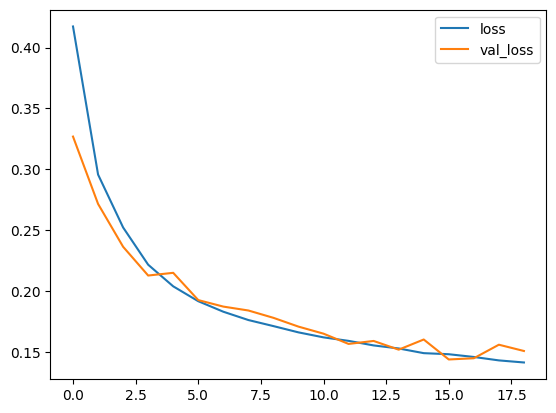

In [33]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping],
    verbose=2
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [34]:
# Evaluate the model on the training data
train_results = model.evaluate(X_train, y_train)
print("Train loss:", train_results[0])
print("Train accuracy:", train_results[1])

# Evaluate the model on the test data
test_results = model.evaluate(X_test, y_test)
print("Test loss:", test_results[0])
print("Test accuracy:", test_results[1])

7256/7256 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9457 - loss: 0.1378
Train loss: 0.1371232122182846
Train accuracy: 0.9456911087036133
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9434 - loss: 0.1421
Test loss: 0.14372500777244568
Test accuracy: 0.9425645470619202


# Key Findings

- The model have a high accuracy on the training (93.65%) and the test data (93.38%), indicating that model performs well on unseen data. 
- Training (0.157) and test loss (0.163) are close to each other, which means that model has good generalization ability and is not overfitted.
